In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

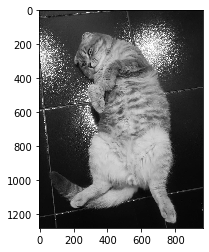

In [2]:
img = Image.open('cat.jpeg')
img = img.convert('L', colors=256)
img = np.array(img, dtype=np.uint8)
imgplot = plt.imshow(img, cmap='gray')
plt.show()

In [3]:
print('Shape of image:', img.shape)

Shape of image: (1280, 960)


In [4]:
# PCA for synthetic dataset

X = np.asarray([[12, 15, 20, 24, 27, 30, 63, 8, 67, 43, 11, 15, 67], 
                [34, 31, 29, 88, 76, 80, 89, 53, 48, 66, 45, 50, 85], 
                [45, 50, 43, 60, 65, 59, 89, 53, 43, 31, 33, 40, 80]]).T
print('Shape of input data:', X.shape)

Shape of input data: (13, 3)


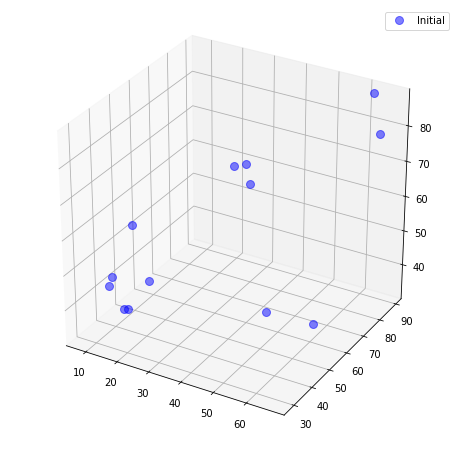

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(X.T[0,:], X.T[1,:], X.T[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='Initial')

ax.legend(loc='upper right')

plt.show()

In [6]:
# standardization

def standardize(X):
    """
    standardizing data before processing
    
    Arguments:
    X -- matrix of input features of shape (n_examples, n_features)
    
    Returns:
    X_stand -- standardized matrix of shape (n_examples, n_features)
    stand_parameters -- matrix of standardization parameters, such as mean and std by columns;
        shape (2, n_features)    
    """    
    
    n_examples = X.shape[0]
    n_features = X.shape[1]
    stand_parameters = np.zeros((2, n_features))
    
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    
    stand_parameters[0] = X_mean
    stand_parameters[1] = X_std
    
    X_stand = (X - X_mean) / X_std

    return X_stand, stand_parameters

In [7]:
stand_test, stand_pars_test = standardize(X)
print('Standardized:')
print(stand_test[0])
print('Parameters:')
print(stand_pars_test)

Standardized:
[-0.89985013 -1.19521931 -0.49137306]
Parameters:
[[30.92307692 59.53846154 53.15384615]
 [21.02914292 21.36717607 16.59400334]]


In [8]:
# standardization using sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XX = scaler.fit_transform(X)
print('Standardized:')
print(XX[0])
print('Parameters:')
print(scaler.mean_)
print(scaler.scale_)

Standardized:
[-0.89985013 -1.19521931 -0.49137306]
Parameters:
[30.92307692 59.53846154 53.15384615]
[21.02914292 21.36717607 16.59400334]


In [9]:
# Eigen vectors/values decomposition

class Eigendecomposition():
        
    def covariance(self, X):
        """
        Calculates eigenvectors and eigenvalues of covariance matrix
        Arguments:
        
        X -- standardized input matrix with shape (n_examples, n_features) 
        
        Returnes:
        
        eig_vals -- array of eigenvalues with shape (n_features, )
        eig_vecs -- matrix of eigenvectors with shape (n_features, n_features)
        """
       
        cov_matrix = np.cov(X.T)        
        
        e_val, e_vect = np.linalg.eig(cov_matrix)        
        
        return e_val, e_vect
    
    def correlation(self, X):
        """
        Calculates eigenvectors and eigenvalues of correlation matrix
        Arguments:
        
        X -- standardized input matrix with shape (n_examples, n_features) 
        
        Returnes:
        
        eig_vals -- array of eigenvalues with shape (n_features, )
        eig_vecs -- matrix of eigenvectors with shape (n_features, n_features)
        """
        
        corr_matrix =np.corrcoef(X.T)        
        
        e_val, e_vect = np.linalg.eig(corr_matrix)        
        
        return e_val, e_vect
    
    def svd(self, X):
        """
        Calculates eigenvectors and eigenvalues by svd
        Arguments:
        
        X -- standardized input matrix with shape (n_examples, n_features)
        
        Returnes:
        
        eig_vals -- array of eigenvalues with shape (n_features, )
        eig_vecs -- matrix of eigenvectors with shape (n_features, n_features)
        """
               
        u, s, v = np.linalg.svd(X)        
        
        e_vect = v.T
        e_val = s
        
        return e_val, e_vect

In [10]:
cov_vals, cov_vects = Eigendecomposition().covariance(stand_test)
cov_vals

array([2.3505513 , 0.58096523, 0.31848347])

In [11]:
cov_vects

array([[ 0.53312874,  0.84469405,  0.04759957],
       [ 0.60130592, -0.33873491, -0.72366418],
       [ 0.59515119, -0.41442807,  0.68850885]])

In [12]:
for ev in cov_vects:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [13]:
cor_vals, cor_vects = Eigendecomposition().correlation(stand_test)
cor_vals

array([2.16973966, 0.5362756 , 0.29398474])

In [14]:
cor_vects

array([[ 0.53312874,  0.84469405,  0.04759957],
       [ 0.60130592, -0.33873491, -0.72366418],
       [ 0.59515119, -0.41442807,  0.68850885]])

In [15]:
for ev in cor_vects:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [16]:
svd_vals, svd_vects = Eigendecomposition().svd(stand_test)
svd_vals

array([5.31099008, 2.6403755 , 1.95494286])

In [17]:
svd_vects

array([[ 0.53312874,  0.84469405, -0.04759957],
       [ 0.60130592, -0.33873491,  0.72366418],
       [ 0.59515119, -0.41442807, -0.68850885]])

In [18]:
for ev in svd_vects:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [19]:
# PCA

class PCA():
    """
    Parameters:
    -----------
    X -- matrix of input features of shape (n_examples, n_features) 
    n -- number of principal components
    """
    
    def __init__(self, X, n, eigendecomposition):
        self.X = X
        self.n = n
        self.eigendecomposition = eigendecomposition
        self.X_stand = None
        self.stand_params = None        
        
    def transform(self):
        """
        Transforms the samples into the new subspace
        
        Returns:
        transformed -- reduced matrix of input features with shape (n_samples, n)
        matrix_w -- matrix of n eigenvectors with largest eigenvalues with shape (n_features, n)
        """
       
        self.X_stand, self.stand_params = standardize(self.X)
        n_features = self.X_stand.shape[1]
                
        e_val, e_vect = self.eigendecomposition(self.X_stand)
        
        len_e_val = len(e_val)        
        low_ind = len_e_val - self.n - 1
        inds = np.argpartition(e_val, range(len_e_val))[(len_e_val-1):low_ind:-1]        
        matrix_w = np.zeros((n_features, 1))
        matrix_w[:, 0] = e_vect[:, inds[0]]
        
        for idx in inds[1:]:            
            e_vect_column = e_vect[:, idx]
            e_vect_column = e_vect_column[:, np.newaxis]            
            matrix_w = np.hstack((matrix_w, e_vect_column))        
        
        transformed = np.dot(self.X_stand, matrix_w)
        self.Y = transformed
        
        return transformed, matrix_w

        
    def restore(self):
        """
        Restores "original" values

        Returns:
        matrix with shape (n_features, n_examples), 
            containing restored values depending on reduced input matrix of features   
        """
        
        transformed, matrix_w = self.transform()
        
        restored_values = np.dot(transformed, matrix_w.T)        
        restored_values = restored_values * self.stand_params[1] + self.stand_params[0]        
        
        return restored_values

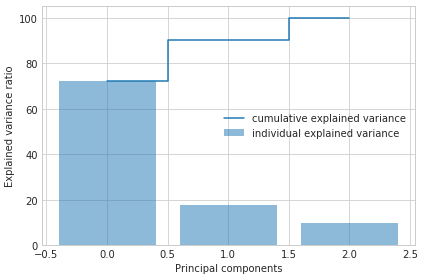

In [20]:
tot = sum(cov_vals)
var_exp = [(i / tot)*100 for i in sorted(cov_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(3), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

In [21]:
pca = PCA(X, 2, Eigendecomposition().correlation)

In [22]:
reduced_x, reduced_eigenvects = pca.transform()
print('Reduced input matrix:')
print(reduced_x[:5])

Reduced input matrix:
[[-1.49086967 -0.15159675]
 [-1.3199115  -0.10840709]
 [-1.50049321  0.29895991]
 [ 0.87097958 -0.90026658]
 [ 0.7886636  -0.71439948]]


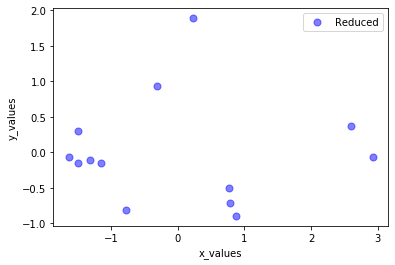

In [23]:
plt.plot(reduced_x.T[0,:], reduced_x.T[1,:], 'o', markersize=7, color='blue', alpha=0.5, label='Reduced')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()

plt.show()

In [24]:
new_x = pca.restore()
print('Restored:')
print(new_x[:5])

Restored:
[[11.51573657 41.48068378 39.47263947]
 [14.1995759  43.36459173 40.86399609]
 [19.41116905 38.09599585 36.27911059]
 [24.69623033 77.24494687 67.94674095]
 [27.07495924 74.84206341 65.85558128]]


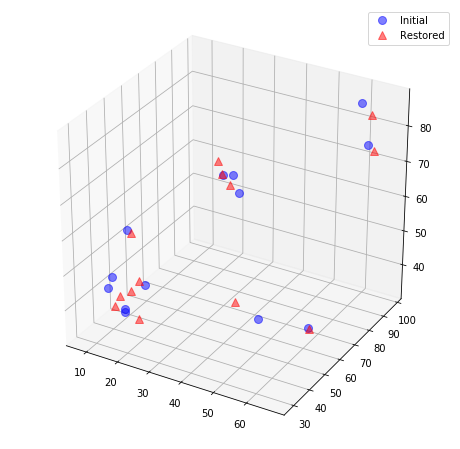

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X.T[0,:], X.T[1,:], X.T[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='Initial')
ax.plot(new_x.T[0,:], new_x.T[1,:], new_x.T[2,:], '^', markersize=8, alpha=0.5, color='red', label='Restored')

ax.legend(loc='upper right')


plt.show()

In [26]:
# Applying PCA to image

pca_img = PCA(img, 50, Eigendecomposition().covariance)

In [27]:
reduced_img, reduced_eigenvects_img = pca_img.transform()
print('Reduced array:')
print(reduced_img.shape)

Reduced array:
(1280, 50)


In [28]:
restored_img = pca_img.restore()

Initial:


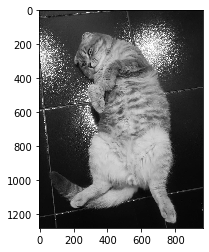

In [29]:
imgplot = plt.imshow(img, cmap='gray')
print('Initial:')
plt.show()

Restored:


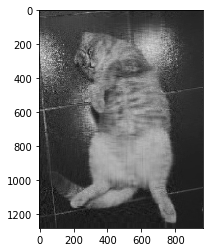

In [30]:
imgplot = plt.imshow(restored_img, cmap='gray')
print('Restored:')
plt.show()

In [31]:
# Using sklearn - PCA and TruncatedSVD

from sklearn.decomposition import TruncatedSVD

n_feats = 50

trunc = TruncatedSVD(n_components=n_feats)
trunc.fit(img)
reduced_img = trunc.transform(img)
print('Reduced array:')
print(reduced_img.shape)

Reduced array:
(1280, 50)


In [32]:
restored_img = pca_img.restore()

Initial:


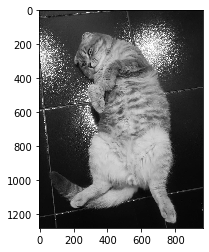

In [33]:
imgplot = plt.imshow(img, cmap='gray')
print('Initial:')
plt.show()

Restored:


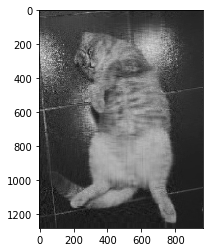

In [34]:
imgplot = plt.imshow(restored_img, cmap='gray')
print('Restored:')
plt.show()

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.913)
pca.fit(img)
reduced_img = pca.transform(img)
print('Reduced array:')
print(reduced_img.shape)

Reduced array:
(1280, 50)


In [36]:
restored_img = pca_img.restore()

Restored:


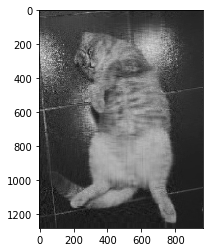

In [37]:
imgplot = plt.imshow(restored_img, cmap='gray')
print('Restored:')
plt.show()

In [38]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

1 component: 48.25% of initial variance
2 component: 12.33% of initial variance
3 component: 7.67% of initial variance
4 component: 5.69% of initial variance
5 component: 3.68% of initial variance
6 component: 1.81% of initial variance
7 component: 1.36% of initial variance
8 component: 1.18% of initial variance
9 component: 0.9% of initial variance
10 component: 0.77% of initial variance
11 component: 0.51% of initial variance
12 component: 0.44% of initial variance
13 component: 0.39% of initial variance
14 component: 0.38% of initial variance
15 component: 0.34% of initial variance
16 component: 0.32% of initial variance
17 component: 0.26% of initial variance
18 component: 0.25% of initial variance
19 component: 0.24% of initial variance
20 component: 0.23% of initial variance
21 component: 0.23% of initial variance
22 component: 0.2% of initial variance
23 component: 0.2% of initial variance
24 component: 0.18% of initial variance
25 component: 0.18% of initial variance
26 compone

In [39]:
# Fraction of explained (by principal components) variance

sum_variance = 0

for i, component in enumerate(pca.components_):
    sum_variance += pca.explained_variance_ratio_[i]
    
sum_variance

0.9133144976108589